# Homework

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pyspark


### Opis merytoryki zbioru danych

Oto opis danych zawartych w pliku "Car details v3.csv":

Zbiór danych zawiera informacje o różnych samochodach. Zawiera on następujące kolumny:

- `name`: Nazwa samochodu.
- `year`: Rok produkcji samochodu.
- `selling_price`: Cena sprzedaży samochodu.
- `km_driven`: Całkowity dystans przejechany przez samochód w kilometrach.
- `fuel`: Rodzaj paliwa używanego przez samochód (np. benzyna, olej napędowy, CNG).
- `seller_type`: Typ sprzedawcy (np. Indywidualny, Dealer).
- `transmission`: Typ skrzyni biegów (np. manualna, automatyczna).
- `owner`: Liczba poprzednich właścicieli samochodu.
- `mileage`: Spalanie samochodu w kilometrach na litr.
- `engine`: Pojemność silnika samochodu w centymetrach sześciennych.
- `max_power`: Maksymalna moc wyjściowa samochodu w KM (konie mechaniczne).
- `seats`: Liczba miejsc w samochodzie.

Naszym celem w przypadku tego zbioru danych jest analiza i eksploracja szczegółów samochodu w celu uzyskania wglądu i podejmowania świadomych decyzji. Możemy wykonywać różne zadania, takie jak czyszczenie danych, wizualizacja danych, analiza statystyczna i modelowanie uczenia maszynowego, aby wydobyć cenne informacje ze zbioru danych.

### Statystyki opisowe zmiennych

In [167]:
car_vehicles: pd.DataFrame = pd.read_csv("Car details v3.csv")

In [168]:
car_vehicles.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [169]:
car_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [170]:
car_vehicles.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [171]:
car_vehicles.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### Tidy data

Usunięcie wierszy z brakującymi danymi

In [172]:
car_vehicles.dropna(inplace=True)

Zmiana wartości paranumerycznych na numeryczne

In [173]:
def leave_only_digits(val):
    if isinstance(val, int):
        return val
    else:
        return int("".join([char for char in val if char.isdigit()]))


In [174]:
car_vehicles[['mileage', 'engine', 'max_power']] = car_vehicles[['mileage', 'engine', 'max_power']].applymap(leave_only_digits)

/tmp/ipykernel_75725/4210757141.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  car_vehicles[['mileage', 'engine', 'max_power']] = car_vehicles[['mileage', 'engine', 'max_power']].applymap(leave_only_digits)


Zmiana wartości string na odpowiadające im liczby

In [183]:
# car_vehicles[['fuel', 'seller_type', 'transmission', 'owner']] = car_vehicles[['fuel', 'seller_type', 'transmission', 'owner']].astype('category')
# car_vehicles.info()

car_vehicles[].unique()['fuel', 'seller_type', 'transmission', 'owner']

AttributeError: 'DataFrame' object has no attribute 'unique'

### Wykresy rozkładu oraz korelacji zmienych

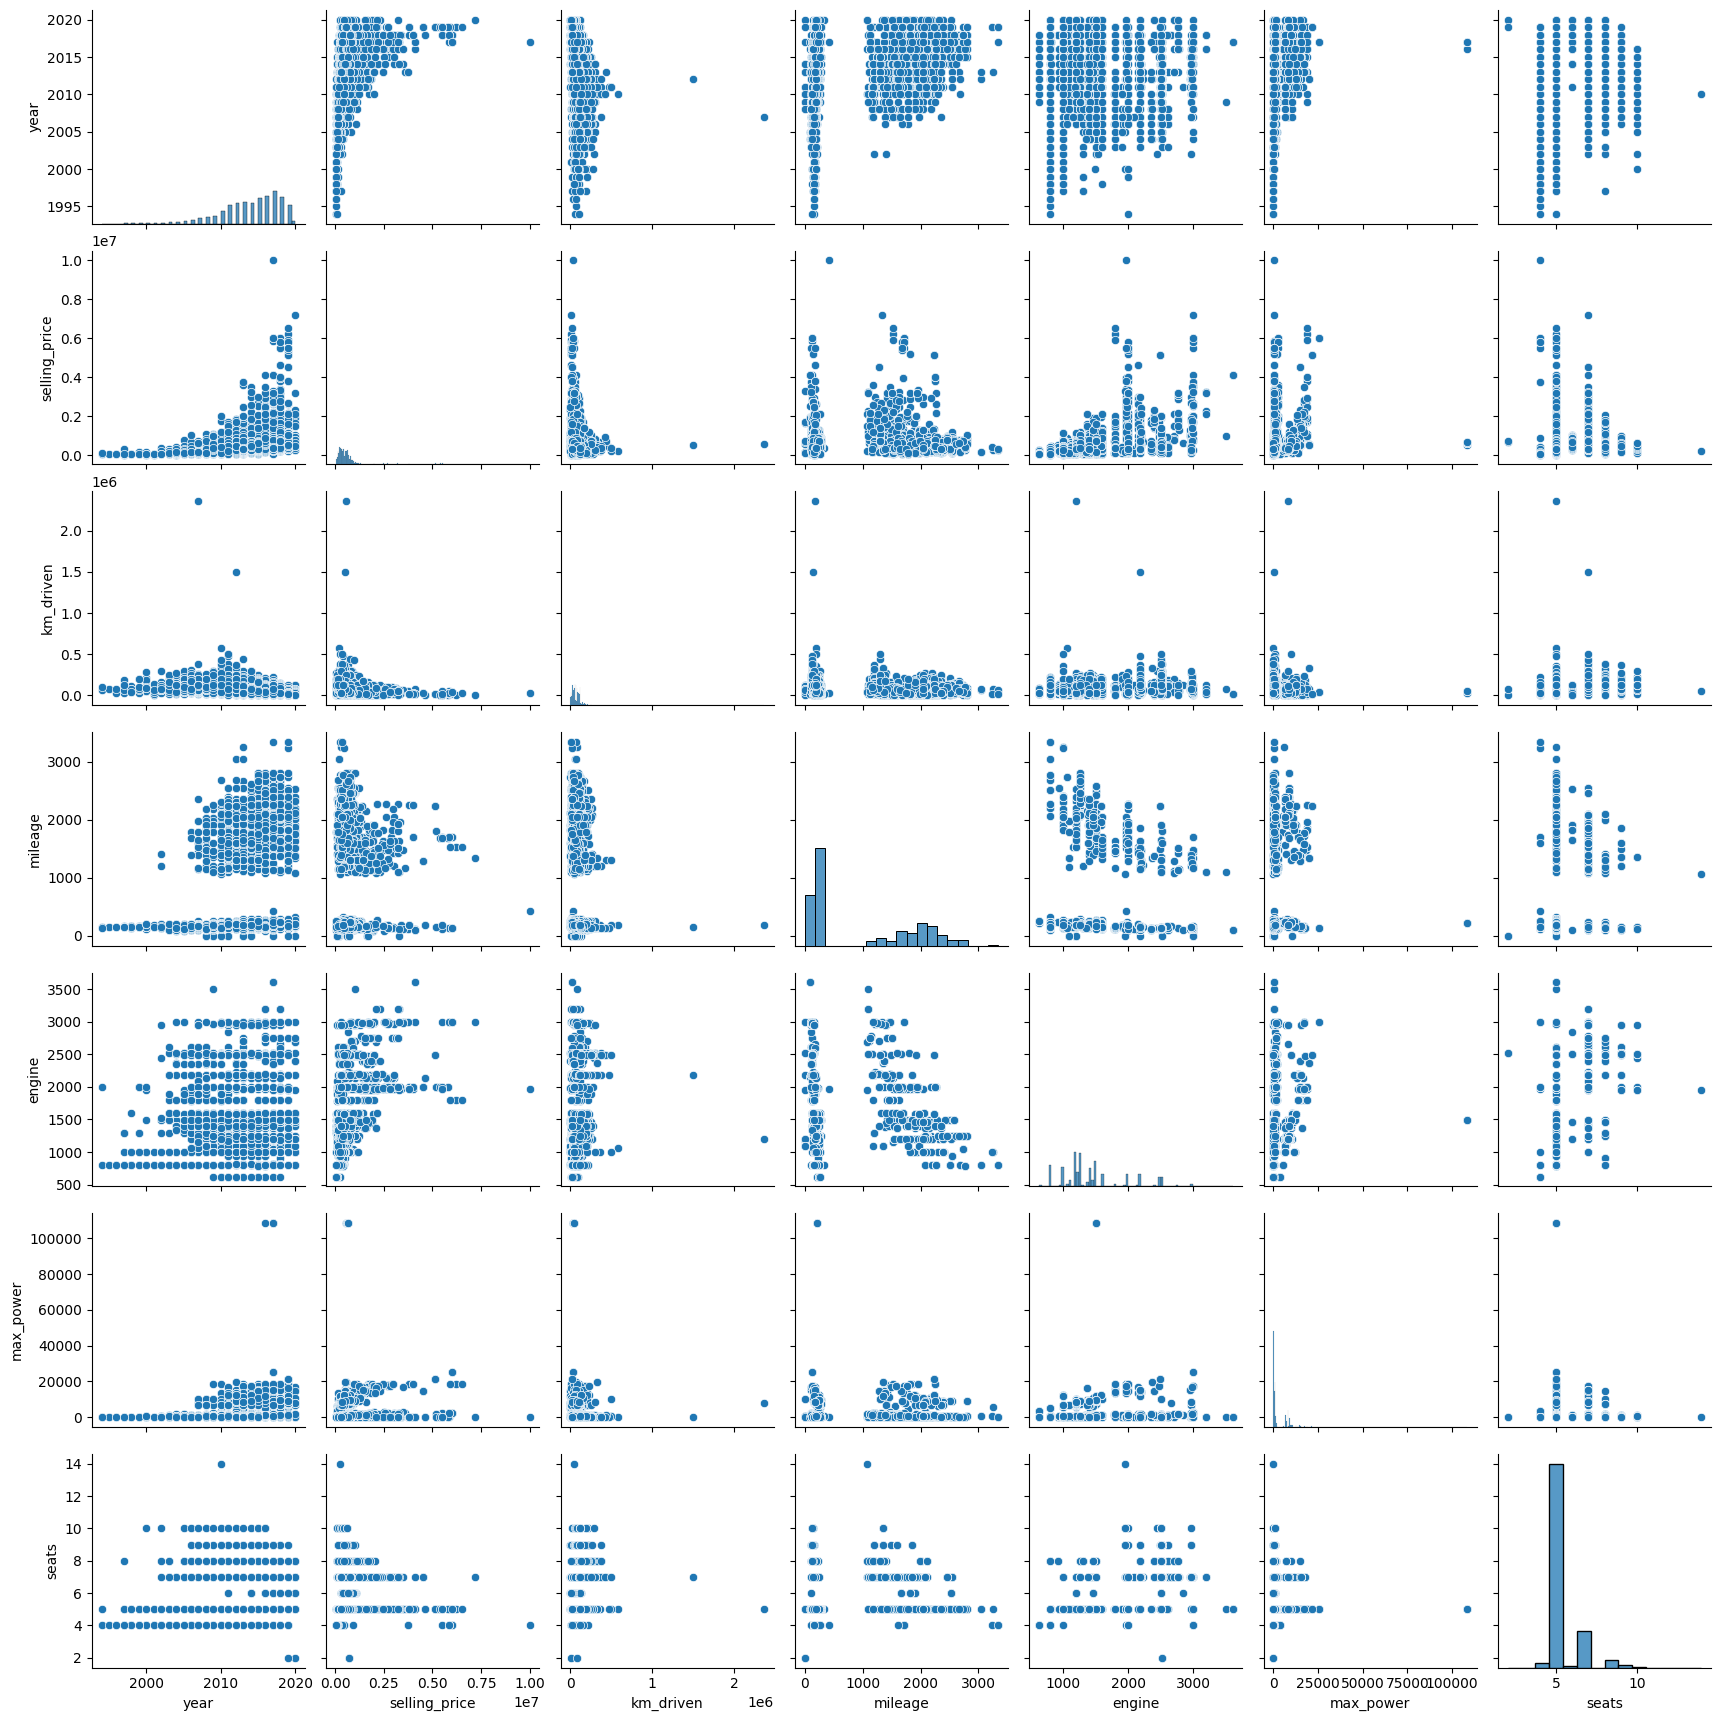

In [176]:
sns.pairplot(car_vehicles)

/tmp/ipykernel_75725/2940990897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_vehicles['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

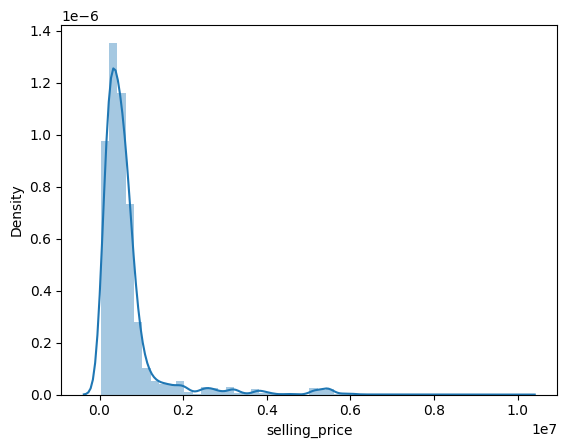

In [177]:
sns.distplot(car_vehicles['selling_price'])

<Axes: >

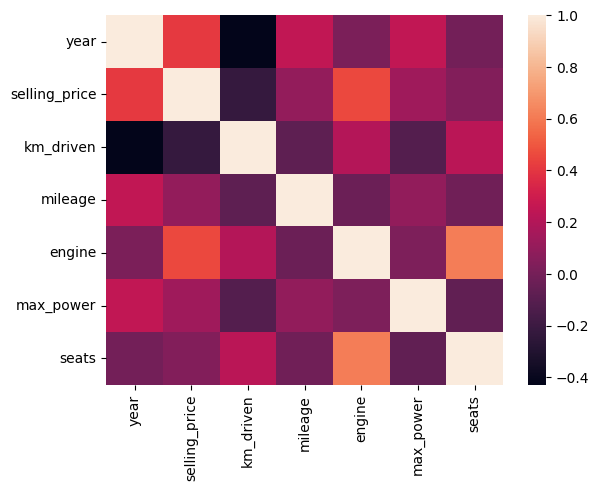

In [178]:
numeric_df = car_vehicles.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())

### Wykres rozkładu zmiennej zależnej

### Modele zbudowane za pomocą: statmodels oraz sklearn

In [180]:
x = car_vehicles[[ 'km_driven', 'year', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage']]
y = car_vehicles['selling_price']
# x["transmission"].unique()

In [181]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [182]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Petrol'

In [ ]:
print(lm.intercept_)


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

### Predykcje i ocenę dopasowania na zbiorze testowym - wykres + miary MAE, RMSE

In [ ]:
predictions = lm.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### Interpretacja oszacowań modelu oraz własności statystycznych modelu